# Random Forest and Boosting Lab

In this lab we will practice using Random Forest Regressor and Boosted Trees Regressor on the Project 6 Data.

> Instructor Notes:
- This walks the students through a sample dataset, they should actually do it on the full dataset they have created as part of Project 6.
- The code for this lab is shorter than usual in order to give the students time to practice with Tableau.

## 1. Load and inspect the data

As part of your work of project 6 you should have retrieved the top 250 movies from IMDB. Conduct this lab on the data you have retrieved.

In the [asset folder](../../assets/datasets/imdb_p6_sample.csv) you can find a subset of the movies, in case you have not completed yet Project 6.

1. Load the dataset and inspect it
- Assign the rating to a y vector and the binary columns to an X feature matrix
- What would you do with the year variable?
> Answer: normalize it and use it as feature

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('./../../assets/datasets/imdb.csv', sep ='\t')

In [16]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(max_features = 50,
                             ngram_range=(1, 1),
                             stop_words='english',
                             binary=True)

X_plot = v.fit_transform(df.Plot)
plot_df = pd.DataFrame(X_plot.todense(), columns=v.get_feature_names())

In [36]:
df.Country.value_counts()
v = CountVectorizer(max_features = 100,
                             ngram_range=(1, 1),
                             stop_words='english',
                             binary=True,
                             token_pattern=u'(?u)\\b\\w\\w+\\b')

X_Country = v.fit_transform(df.Country)
Country_df = pd.DataFrame(X_Country.todense(), columns=v.get_feature_names())

In [55]:
X_Lang = v.fit_transform(df.Language)
Lang_df = pd.DataFrame(X_Lang.todense(), columns=v.get_feature_names())

In [62]:
Rated_df= pd.get_dummies(df.Rated)

In [66]:
imdb = pd.concat([df, plot_df, Country_df, Lang_df, Rated_df], axis=1, join_axes=[df.index])

In [148]:
from sklearn.preprocessing import StandardScaler, Normalizer
X = Normalizer()

X = X.fit_transform(imdb._get_numeric_data().drop("imdbRating", axis=1))
y = imdb.imdbRating

## 2. Decision Tree Regressor


1. Train a decision tree regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
    - They should align to a diagonal line.
- Add some text to the plot indicating the average $R^2$ coefficient

In [146]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

/Users/Shreyas/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

cross Val Score:  -10.4417798699


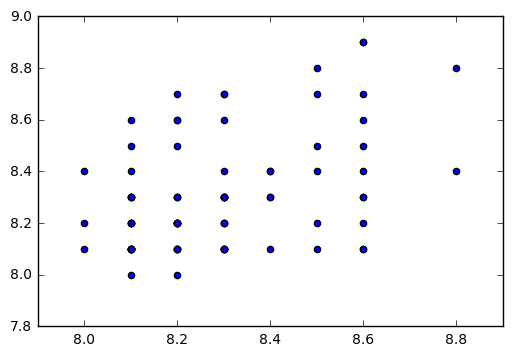

R2 Score:  -0.0397298127111


In [150]:
dtr = DecisionTreeRegressor(random_state=1)
scrs = cross_val_score(dtr, X, y, cv=3)
print "cross Val Score: ", np.mean(scrs)

dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)
plt.scatter(y_pred, y_test)
plt.show()
print "R2 Score: ", dtr.score(X_test, y_test)

## 3. Random Forest Regressor


1. Train a random forest regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- How does this plot compare with the previous one?
> Answer: points are tighter now, indicating a better fit

cross Val Score:  -8.63045782056


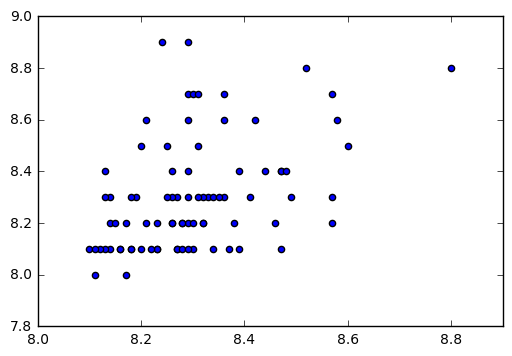

R2 Score:  0.152263432607


In [151]:
RFR = RandomForestRegressor(random_state=1)
scrs = cross_val_score(RFR, X, y, cv=3)
print "cross Val Score: ", np.mean(scrs)

RFR.fit(X_train, y_train)

y_pred = RFR.predict(X_test)
plt.scatter(y_pred, y_test)
plt.show()
print "R2 Score: ", RFR.score(X_test, y_test)

## 4. AdaBoost Regressor


1. Train a AdaBoost regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- Compare with previous score

cross Val Score:  -10.2787721924


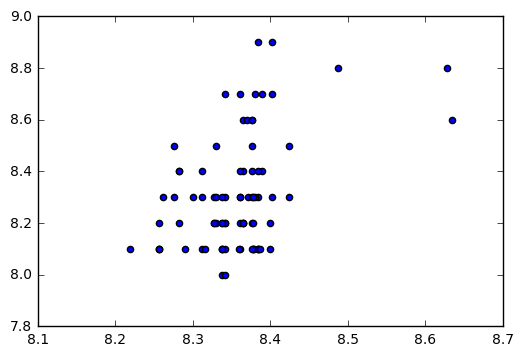

R2 Score:  0.115627938335


In [114]:
ABR = AdaBoostRegressor(random_state=1)
scrs = cross_val_score(ABR, X, y, cv=3)
print "cross Val Score: ", np.mean(scrs)

ABR.fit(X_train, y_train)

y_pred = ABR.predict(X_test)
plt.scatter(y_pred, y_test)
plt.show()
print "R2 Score: ", ABR.score(X_test, y_test)


## 4. Gradient Boosting Trees Regressor


1. Train a Gradient Boosting Trees regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- Compare with previous score

cross Val Score:  -8.84332323617


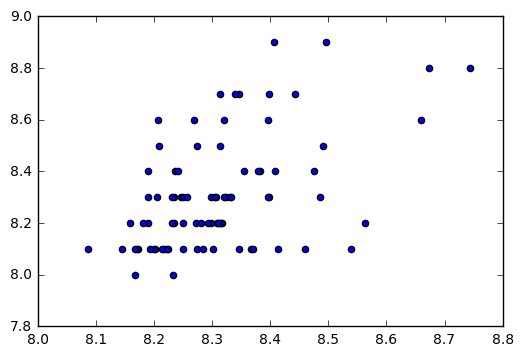

R2 Score:  0.25723073839


In [116]:
GBR = GradientBoostingRegressor(random_state=1)
scrs = cross_val_score(GBR, X, y, cv=3)
print "cross Val Score: ", np.mean(scrs)

GBR.fit(X_train, y_train)

y_pred = GBR.predict(X_test)
plt.scatter(y_pred, y_test)
plt.show()
print "R2 Score: ", GBR.score(X_test, y_test)

#### GradientBoostingRegressor is giving the best score for my input features.

## 5. Tableau Practice

Put your data into Tableau. Once it is there, make a new url on your website and upload your new Tableau document to your site. Post your website's URL below.

### https://obscure-hollows-37474.herokuapp.com/site/

## Bonus

Take the best model and try to improve it using grid search.